

# **Google Play Store Analysis**

## **Author:** Danish Azeem

## **Email Address:** danishazeem365@gmail.com

## **Github:** https://github.com/danishazeem365


### **Project Overview**  

## About Dataset

> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

Google PlayStore Android App Data. (2.3 Million+ App Data)
---

## **Introduction**  
The Google Play Store is one of the largest app marketplaces, hosting millions of apps across various categories. Understanding the patterns in app ratings, downloads, pricing, and monetization strategies is essential for developers, businesses, and researchers.  

In this project, we perform an in-depth analysis of Google Play Store data to uncover trends and insights. This includes:  
- **Data Cleaning & Preprocessing**: Handling duplicates, missing values, and formatting inconsistencies.  
- **Exploratory Data Analysis (EDA)**: Understanding app distribution, pricing models, and user engagement.  
- **Correlation & Trends**: Investigating relationships between ratings, installs, and other key factors.  
- **Visualization**: Using charts and graphs to present insights effectively.  

## **Objectives**  
✅ Identify key trends in app categories, pricing, and ratings.  
✅ Analyze how installs correlate with rating count and app size.  
✅ Explore the distribution of free vs. paid apps and their pricing patterns.  
✅ Provide actionable insights for app developers and businesses.  

By the end of this analysis, we will have a comprehensive understanding of Google Play Store trends, which can help in making data-driven decisions for app development and marketing strategies.  

---



# **1. Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data Sets/Google-Playstore.csv')
print(df.head())


Mounted at /content/drive
                                            App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True 

# **2. Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas

 ↪ creating the dataframe and understanding the data present in the dataset using pandas

 ↪ Dealing with the missing data, outliers and the incorrect records

- Viewing the first five Rows of the data

In [5]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [6]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [7]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')


- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [8]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [9]:
df.shape

(2312944, 24)

Not enough, let's have a look on the columns and their data types using detailed info function

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

# **Observations**
---
1. There are 10841 rows and 24 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - 'App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time',
     
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Installs','Size', 'Minimum Android'`

In [11]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


## Observations:
---
- We have 5 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Installs','Size', 'Minimum Android'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [12]:
df['Installs'].isnull().sum()

107

- We have 107 null values

In [13]:
df['Installs'] = df['Installs'].fillna('')


In [14]:
# Replace empty strings with '0'
df['Installs'] = df['Installs'].replace('', '0')

- Firstly we have to fill null values with '  ' secondly replace it with 0

In [15]:
df['Installs'].isnull().sum()

0

- No null values, we are good to go.

In [16]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '0',
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [17]:
df['Installs'].value_counts()

,count
Installs,
100+,443368
"1,000+",398199
10+,300156
"10,000+",256723
500+,189077
50+,170465
"5,000+",143593
"100,000+",110257
"50,000+",75359


In [18]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\\+')].value_counts().sum()

2312837

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [19]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed

In [20]:
df.head() # check the head of the dataframe

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [21]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [22]:
df['Installs'].max() # this will show the value counts of the column

10000000000

In [23]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [24]:
df['Installs_category'].value_counts() # check the value counts of the new column

,count
Installs_category,
Low,1201109
Very low,439273
Moderate,400316
More than moderate,185616
High,60662
Very High,12787
no,11673
Top Notch,1508


- Let's clean the `Size` column

In [25]:
# check for null values
df['Size'].isnull().sum()

196

In [26]:
df['Size'] = df['Size'].fillna('0M')


- No null values, we are good to go.

In [27]:
df['Size'].value_counts()

,count
Size,
Varies with device,74777
11M,62157
12M,56080
13M,48034
14M,45211
16M,42474
15M,41306
17M,37244
10M,34114


In [28]:
# check unique values
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [29]:
df['Size'].loc[df['Size'].str.contains('M',)].value_counts().sum()

2201901

In [30]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k',)].value_counts().sum()

36253

In [31]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

74777

In [32]:
# Total Values in Size column
df['Size'].value_counts().sum()

2312944

- We have `2201901` values in `M` units
- We have `36253` values in `k` units
- We have `74777` value in `Varies with device`

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [33]:
print(df.columns)


Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'Installs_category'],
      dtype='object')


In [34]:
def convert_size(size):
    if isinstance(size, str):
        # Remove commas
        size = size.replace(',', '')
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'G' in size:
            return float(size.replace('G', '')) * 1024 * 1024 * 1024
        else:
            try:
                return float(size)
            except ValueError:
                return np.nan
    return size


In [35]:
df['Size'] = df['Size'].apply(convert_size)


In [36]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [37]:
 # Convert to numeric, coercing errors to NaN (in case of invalid values)
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

In [38]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Minimum Android` column

In [39]:
df['Minimum Android'].isnull().sum()

6530

In [40]:
df['Minimum Android'] = df['Minimum Android'].fillna('')

In [41]:
# Replace empty strings with '0'
df['Installs'] = df['Installs'].replace('', '0')


In [42]:
df['Minimum Android'].isnull().sum()

0

- No null values, we are good to go.


In [43]:
df['Minimum Android'].unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', '', '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3 

In [44]:
df['Minimum Android'].value_counts()

,count
Minimum Android,
4.1 and up,604465
5.0 and up,396998
4.4 and up,390311
4.0.3 and up,180482
4.0 and up,153441
4.2 and up,115973
6.0 and up,89928
2.3 and up,65577
5.1 and up,59287


In [45]:
df['Rating Count'].value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
df.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size_in_bytes,Size_in_Mb
count,2.290061e+06,2.290061e+06,2.312944e+06,2.312837e+06,2.312944e+06,2.312944e+06,2.238167e+06,2.238167e+06
mean,2.203152e+00,2.864839e+03,1.834367e+05,1.834452e+05,3.202017e+05,1.034992e-01,2.013958e+07,1.920660e+01
std,2.106223e+00,2.121626e+05,1.513109e+07,1.513144e+07,2.355495e+07,2.633127e+00,2.521641e+07,2.404825e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,5.138022e+06,4.900000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00,1.048576e+07,1.000000e+01
75%,4.300000e+00,4.200000e+01,5.000000e+03,5.000000e+03,7.354000e+03,0.000000e+00,2.621440e+07,2.500000e+01
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,1.610613e+09,1.536000e+03


## Observations:
---
- Now, we have only 8 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `2.20` which is not a good rating. On an average people give this rating.
- We can see that the `Rating Count	` column has a minimum value of `1` and a maximum value of `64288`
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.


- Let's have a look on the missing values in the dataset

In [47]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

1448472

- Let's plot the missing values in the dataset

<Axes: >

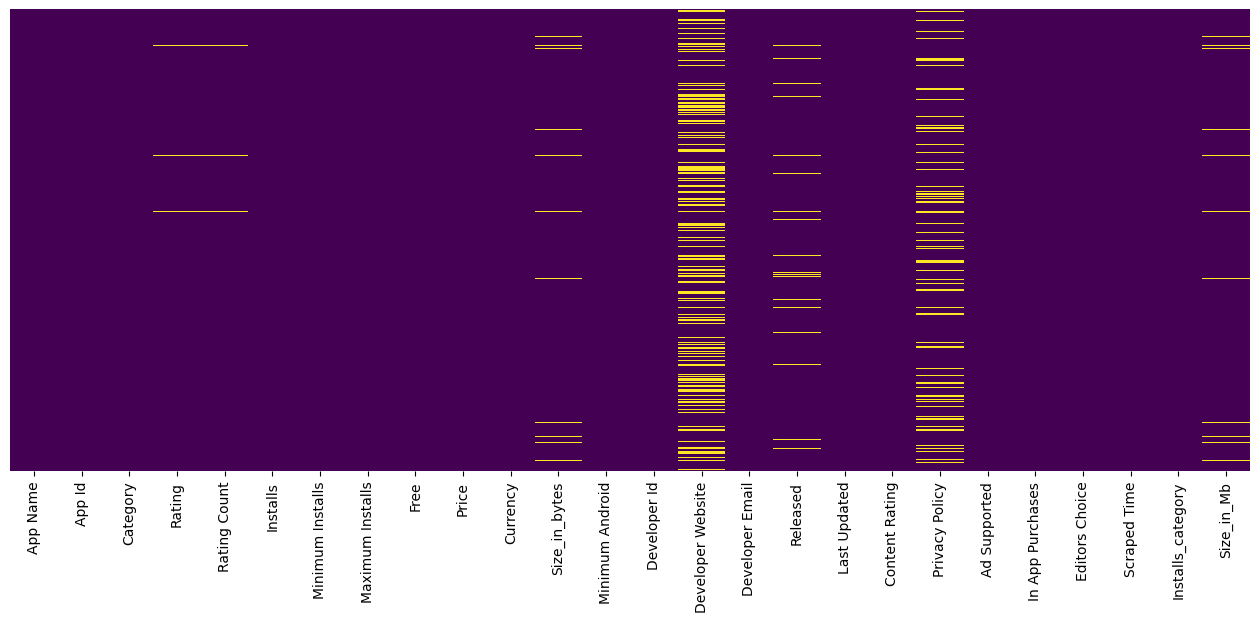

In [48]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

In [49]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

,0
Developer Website,760835
Privacy Policy,420953
Size_in_Mb,74777
Size_in_bytes,74777
Released,71053
Rating,22883
Rating Count,22883
Currency,135
Minimum Installs,107
Developer Id,33


In [50]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

,0
Developer Website,32.894657
Privacy Policy,18.199879
Size_in_Mb,3.232979
Size_in_bytes,3.232979
Released,3.071972
Rating,0.989345
Rating Count,0.989345
Currency,0.005837
Minimum Installs,0.004626
Developer Id,0.001427


## Observations:
---
- We have 760835 missing values in the `'Developer Website'` column, which is 32.89% of the total values in the column.
- We have 420953 missing values in the `'Privacy Policy '` column, which is 18.19% of the total values in the column.
- We have 74777 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 3.23% of the total values in the column.
- We have 71053 missing values in the `'Released'` column, which is  3.07% of the total values in the column.
- We have 22883 missing value in the `'Rating'` column, which is 0.98% of the total values in the column.
- We have 22883 missing values in the `'Rating Count'` column, which is 0.98% of the total values in the column.
- We have 135 missing value in `Currency` columns, which is  0.005837% of the total values in the column.
- We have 107 missing value in `Minimum Installs` columns, which is  0.001427% of the total values in the column.
- We have 33 missing value in `Developer Id` columns, which is  0.005837% of the total values in the column.
- We have 31 missing value in `Developer Email` columns, which is  0.001340% of the total values in the column.
- We have 5 missing value in `App Name` columns, which is  0.000216% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [51]:
df.describe() # these are numeric columns

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size_in_bytes,Size_in_Mb
count,2.290061e+06,2.290061e+06,2.312944e+06,2.312837e+06,2.312944e+06,2.312944e+06,2.238167e+06,2.238167e+06
mean,2.203152e+00,2.864839e+03,1.834367e+05,1.834452e+05,3.202017e+05,1.034992e-01,2.013958e+07,1.920660e+01
std,2.106223e+00,2.121626e+05,1.513109e+07,1.513144e+07,2.355495e+07,2.633127e+00,2.521641e+07,2.404825e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,5.138022e+06,4.900000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00,1.048576e+07,1.000000e+01
75%,4.300000e+00,4.200000e+01,5.000000e+03,5.000000e+03,7.354000e+03,0.000000e+00,2.621440e+07,2.500000e+01
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,1.610613e+09,1.536000e+03


<Axes: >

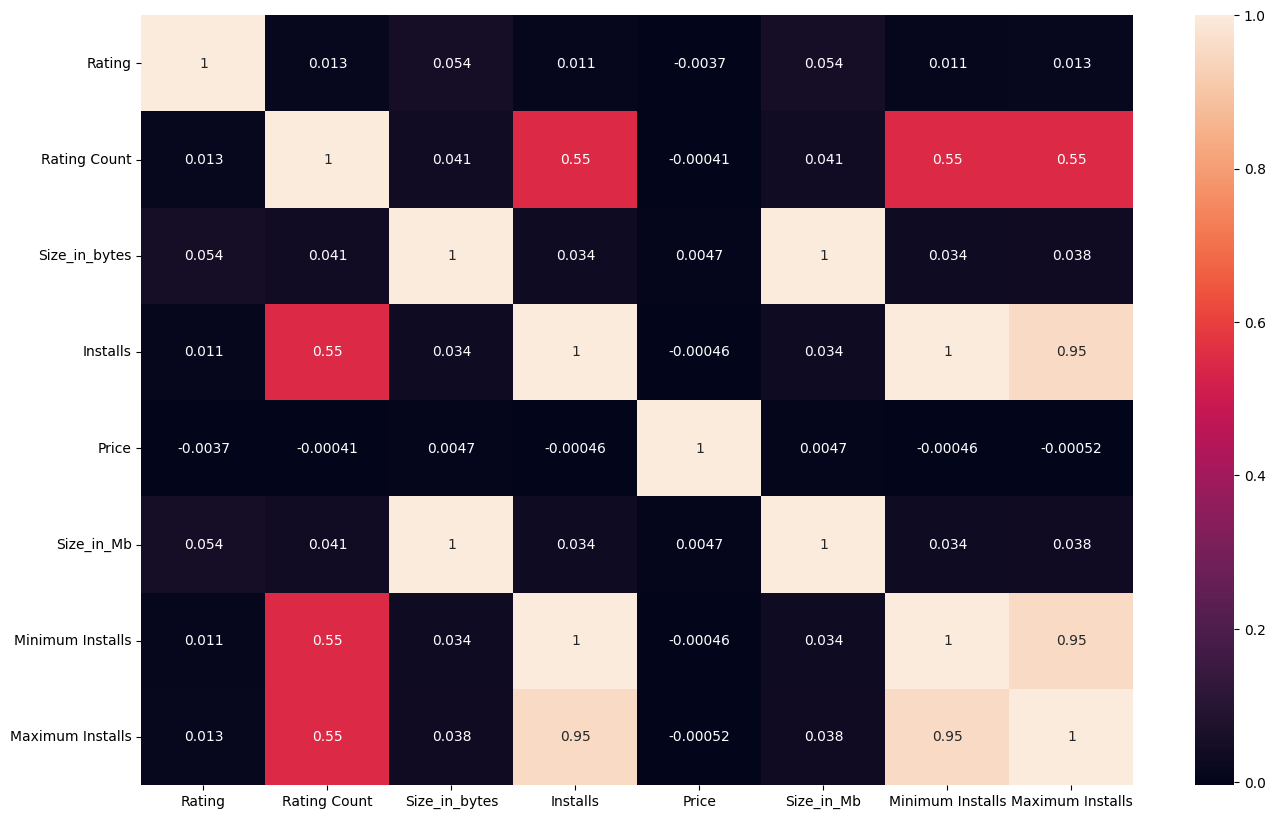

In [52]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size
numeric_cols = ['Rating', 'Rating Count', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb','Minimum Installs','Maximum Installs'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [53]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Rating Count,Size_in_bytes,Installs,Price,Size_in_Mb,Minimum Installs,Maximum Installs
Rating,1.000000,0.013038,0.054230,0.011214,-0.003674,0.054230,0.011214,0.012615
Rating Count,0.013038,1.000000,0.041200,0.545281,-0.000411,0.041200,0.545281,0.547571
Size_in_bytes,0.054230,0.041200,1.000000,0.034028,0.004665,1.000000,0.034033,0.037909
Installs,0.011214,0.545281,0.034028,1.000000,-0.000461,0.034028,1.000000,0.954037
Price,-0.003674,-0.000411,0.004665,-0.000461,1.000000,0.004665,-0.000461,-0.000515
Size_in_Mb,0.054230,0.041200,1.000000,0.034028,0.004665,1.000000,0.034033,0.037909
Minimum Installs,0.011214,0.545281,0.034033,1.000000,-0.000461,0.034033,1.000000,0.954037
Maximum Installs,0.012615,0.547571,0.037909,0.954037,-0.000515,0.037909,0.954037,1.000000


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Rating Count` column has a high correlation with the `Installs` column, which is `0.54` according to corr(). Which is quite good.
 This shows that the more the Rating Count the more the installs are for one app. If in any case we need to impute Rating Count we have to think of number of install.
  
- We can see that the `Rating Count` column has a high correlation with the `Minimum Installs	`  which is `1.00` according to corr(). Which is very good.This shows that the more the Minimum Installs Count the more the installs are for one app. If in any case we need to impute Rating Count we have to think of number of install.

- We can see that the `Rating Count` column has a high correlation with the `Maximum Installs	`  which is `0.94` according to corr(). Which is very good.This shows that the more the Maximum Installs Count the more the installs are for one app. If in any case we need to impute Rating Count we have to think of number of install.

    

- Before going ahead, let's remove the rows with missing values in the `Size_in_Mb `, `Size_in_bytes`, `Released`, `Rating` and `Rating Count ``Currency``, ``Minimum Installs`` ,``Developer Id `` ,``Developer Email ``,``App Name `` columns, as they are very less in number and will not affect our analysis.


In [54]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 2312944


In [55]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Size_in_Mb', 'Size_in_bytes', 'Released','Rating','Rating Count','Currency','Minimum Installs','Developer Id','Developer Email','App Name'], inplace=True)

In [56]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 2190366



- We have removed `122,578` rows having null values in the `'Size_in_Mb'`, `'Size_in_bytes'`, `'Released'`,`'Rating'`,`'Rating Count'`,`'Currency'`,`'Minimum Installs'`,`'Developer Id'`,`'Developer Email'`,`'App Name'` columns.

In [57]:
df['Developer Website'].fillna(df['Developer Website'].mode().iloc[0], inplace=True)
df['Privacy Policy'].fillna(df['Privacy Policy'].mode().iloc[0], inplace=True)

In [58]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

,0
App Name,0
App Id,0
Installs_category,0
Scraped Time,0
Editors Choice,0
In App Purchases,0
Ad Supported,0
Privacy Policy,0
Content Rating,0
Last Updated,0


In [59]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size_in_bytes,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Installs_category,Size_in_Mb
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,USD,10485760.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Very low,10.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,USD,3040870.4,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Moderate,2.9
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,USD,3879731.2,4.0.3 and up,Cabin Crew,http://www.subsplash.com/,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Low,3.7
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,USD,1887436.8,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,http://www.subsplash.com/legal/privacy,True,False,False,2021-06-15 20:19:35,Very low,1.8
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,USD,6501171.2,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Low,6.2


---
## **Observations**
- We compute `Developer Website` and `Privacy Policy ` columns with mode because they are Catagorecal variable. Now, there is no Null values and we are good to go.
---

In [60]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size_in_bytes', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'Installs_category', 'Size_in_Mb'],
      dtype='object')

In [61]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,10987.0,0.051506,0.462127,0.0,0.0,0.0,0.0,5.0
Very low,417300.0,0.218836,1.009939,0.0,0.0,0.0,0.0,5.0
Low,1146428.0,2.018742,2.170775,0.0,0.0,0.0,4.4,5.0
Moderate,378085.0,3.823591,0.979757,0.0,3.6,4.1,4.4,5.0
More than moderate,171797.0,3.895689,0.777444,0.0,3.6,4.1,4.4,5.0
High,54011.0,4.018124,0.545694,0.0,3.8,4.1,4.4,5.0
Very High,10737.0,4.143839,0.406197,0.0,4.0,4.2,4.4,5.0
Top Notch,1021.0,4.243879,0.338501,1.1,4.1,4.3,4.4,4.9


Text(7, 3.5, 'Null values: 0')

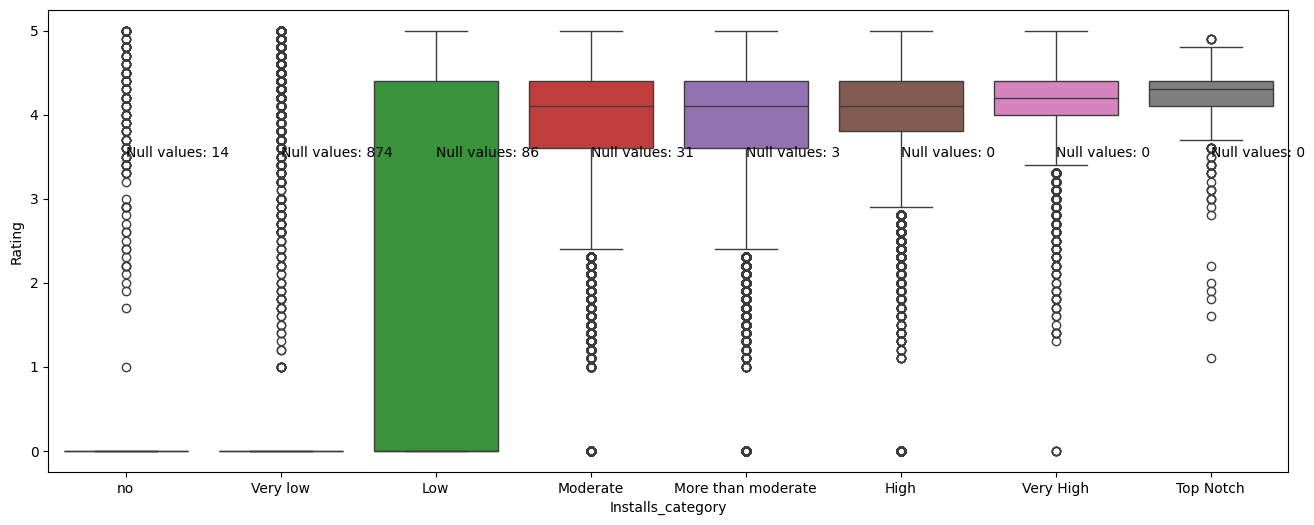

In [62]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

# **2.3. Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [63]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App Name column are: 127861
Number of duplicates in App Id column are: 0
Number of duplicates in Category column are: 2190318
Number of duplicates in Rating column are: 2190324
Number of duplicates in Rating Count column are: 2155602
Number of duplicates in Installs column are: 2190346
Number of duplicates in Minimum Installs column are: 2190346
Number of duplicates in Maximum Installs column are: 1955252
Number of duplicates in Free column are: 2190364
Number of duplicates in Price column are: 2189508
Number of duplicates in Currency column are: 2190353
Number of duplicates in Size_in_bytes column are: 2188720
Number of duplicates in Minimum Android column are: 2190217
Number of duplicates in Developer Id column are: 1468237
Number of duplicates in Developer Website column are: 1433335
Number of duplicates in Developer Email column are: 1295873
Number of duplicates in Released column are: 2186208
Number of duplicates in Last Updated column are: 2186485
Number o


---

**Understand the Context:**
  - Duplicate `App Name:` We have multiple apps with the same name but different details.
  - Duplicate `Category:`Duplicate Category occur because multiple apps belong to the same category.
---



In [97]:
# find exact duplicates and print them
df[df['App Name'].duplicated(keep=False)].sort_values(by='App Name')

In [98]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [99]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 2190366


# **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [100]:
# Top 10 Categories with the most apps
top_categories = df['Category'].value_counts().head(10)
print("Top 10 Categories:\n", top_categories)



Top 10 Categories:
 Category
Education            231119
Music & Audio        151722
Tools                135102
Business             133505
Entertainment        132850
Books & Reference    114027
Lifestyle            113370
Personalization       87795
Health & Fitness      79259
Productivity          73134
Name: count, dtype: int64


## **3.2. Top 10 Categories with Most Apps**

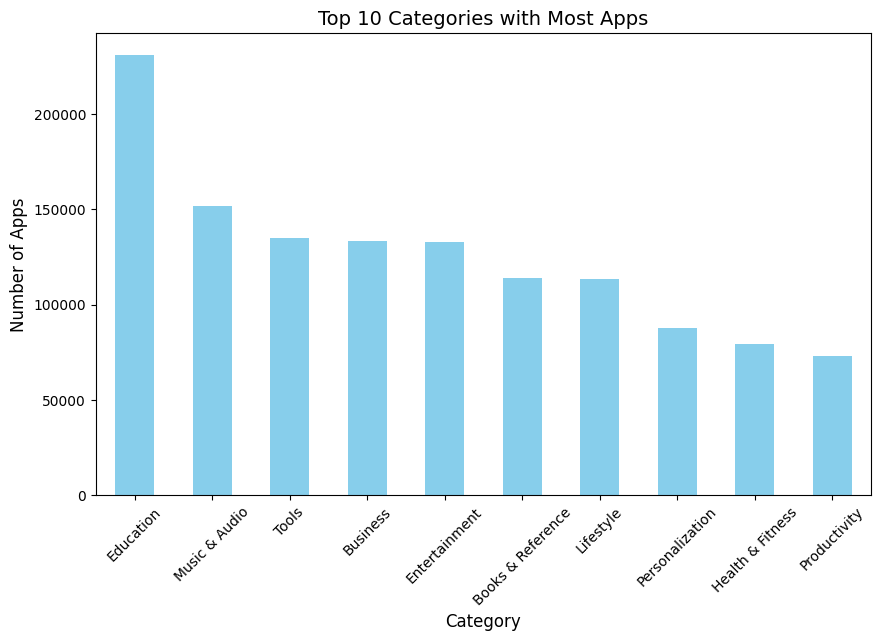

In [101]:
# Top 10 Categories
top_categories.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Categories with Most Apps', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## **3.3. Top 10 Developers with the most apps**

In [105]:
# Top 10 Developers with the most apps
top_developers = df['Developer Id'].value_counts().head(10)
print("Top 10 Developers:\n", top_developers)


Top 10 Developers:
 Developer Id
Subsplash Inc             5422
TRAINERIZE                5153
ChowNow                   4865
Phorest                   2821
BH App Development Ltd    2453
Sharefaith                2076
Flipdish                  1969
J&M Studio                1942
OrderYOYO                 1871
CyJ Studio                1741
Name: count, dtype: int64


In [103]:
# Apps with highest ratings
highest_rated_apps = df[['App Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print("Highest Rated Apps:\n", highest_rated_apps)

# Apps with the most installs
most_installed_apps = df[['App Name', 'Maximum Installs']].sort_values(by='Maximum Installs', ascending=False).head(10)
print("Most Installed Apps:\n", most_installed_apps)

Highest Rated Apps:
                                App Name  Rating
2312943    Biliyor Musun - Sonsuz Yarış     5.0
2056748  Comunidade Evangélica Umuarama     5.0
1396471             QuestionPro - Pulse     5.0
1396465  Excel shortcut keys - Codeplay     5.0
84585                      Confirmit Go     5.0
1396429             Unit Converter Tool     5.0
1396365   By the Grace of Charleigh INC     5.0
1396358                        Sawa 121     5.0
1396328              Block Brick Puzzle     5.0
304512                  DISHA EDUCATION     5.0
Most Installed Apps:
                              App Name  Maximum Installs
52476                 Samsung Gallery        2123105347
741549               Carrier Services        1793502218
787700                 Subway Surfers        1704495994
337866     Samsung Experience Service        1682763021
731501     SHAREit - Transfer & Share        1666016612
65037                          TikTok        1645811582
1845543                      Snapchat

## **3.4. Highest Rated Apps**

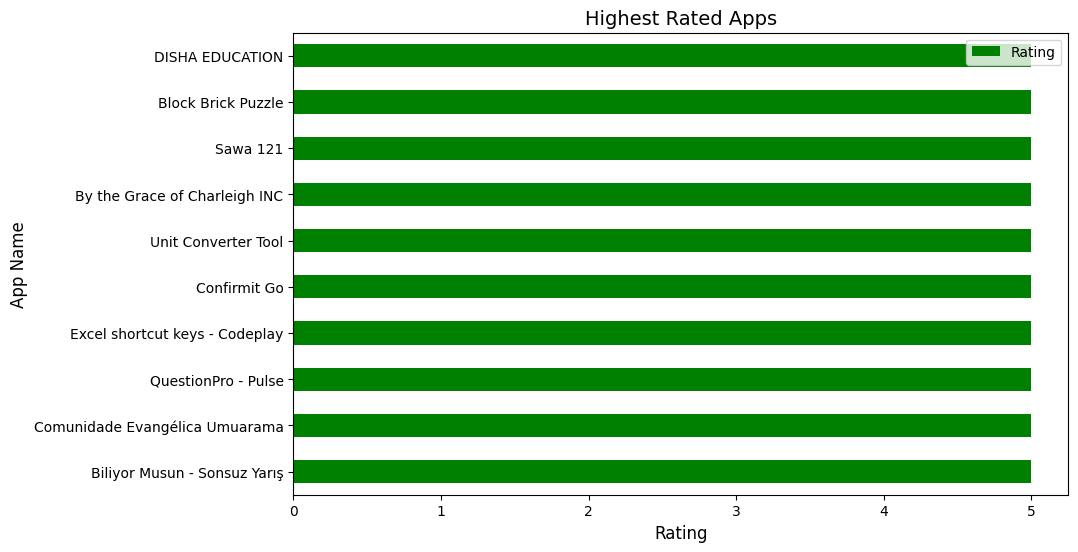

In [104]:
# Horizontal bar plot for highest rated apps
highest_rated_apps.plot(x='App Name', y='Rating', kind='barh', figsize=(10, 6), color='green')
plt.title('Highest Rated Apps', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.show()


# **3.5. Which category has the highest number of installs?**

In [106]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

,Installs
Category,
Tools,26372749346
Action,14124782152
Casual,13898098427
Arcade,13068388364
Entertainment,10664044742
Productivity,10549923489
Simulation,10306884700
Puzzle,9532770566
Photography,9455819647


# **3.6. Which category has the highest rating?**


In [107]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

,Rating
Category,
Role Playing,3.357818
Casino,3.249059
Simulation,3.192696
Weather,3.074540
Card,3.028878
Racing,2.932362
Video Players & Editors,2.889959
Word,2.870103
Strategy,2.835866


## **3.7.Rating Distribution**

<Axes: xlabel='Rating', ylabel='Density'>

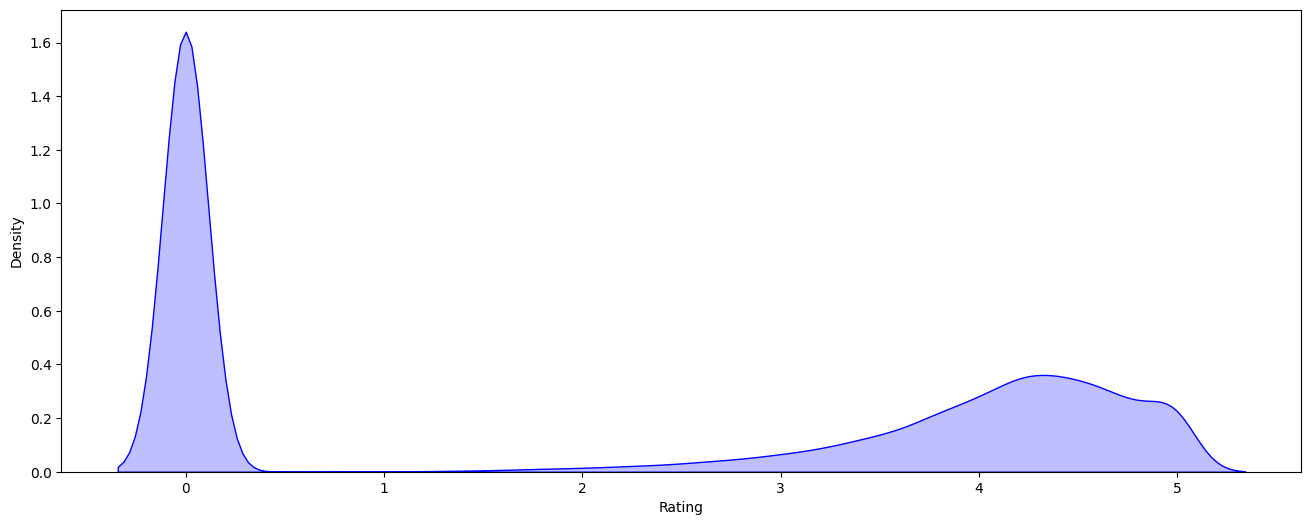

In [108]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

## **3.8. Free vs Paid Apps**

Free vs Paid Apps:
 Type
Free    2148419
Paid      41947
Name: count, dtype: int64
Average Price of Paid Apps: 5.370538872696498


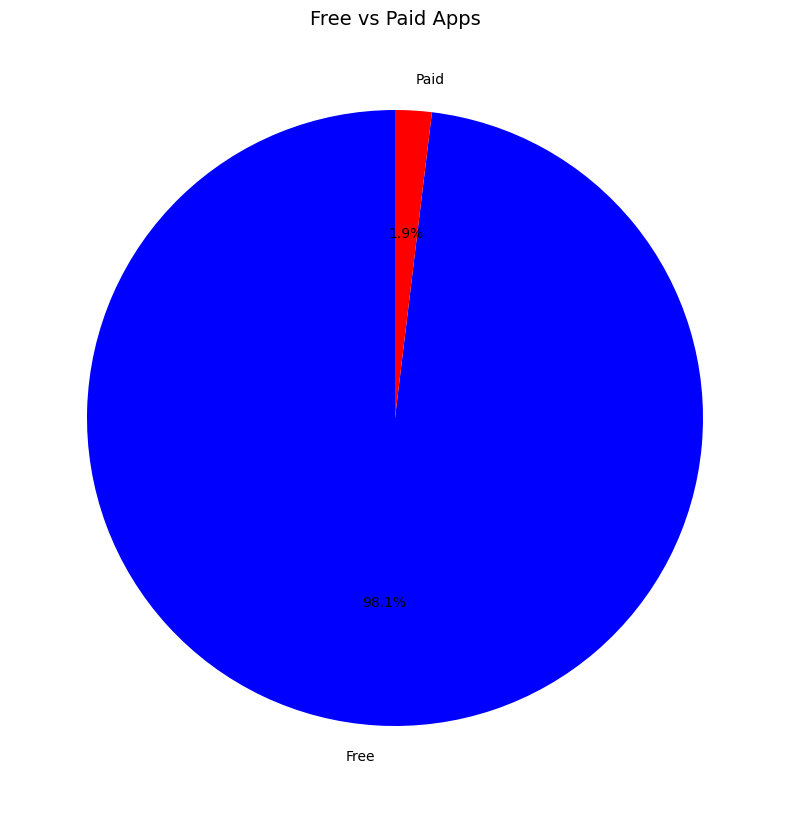

In [110]:
# Rename the column 'Free' to 'Type' for better clarity
df.rename(columns={'Free': 'Type'}, inplace=True)

# Replace boolean values in the 'Type' column with descriptive strings
df['Type'] = df['Type'].replace(True, 'Free')
df['Type'] = df['Type'].replace(False, 'Paid')

# Distribution of Free vs Paid Apps
free_paid_distribution = df['Type'].value_counts()
print("Free vs Paid Apps:\n", free_paid_distribution)

# Average price of paid apps
average_price = df[df['Type'] == 'Paid']['Price'].mean()
print(f"Average Price of Paid Apps: {average_price}")

# Free vs Paid Apps Pie Chart
free_paid_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, colors=['blue', 'red'])
plt.title('Free vs Paid Apps', fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.show()



## **3.9. Impact of size on installs Size_in_Mb vs Installs_category**

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

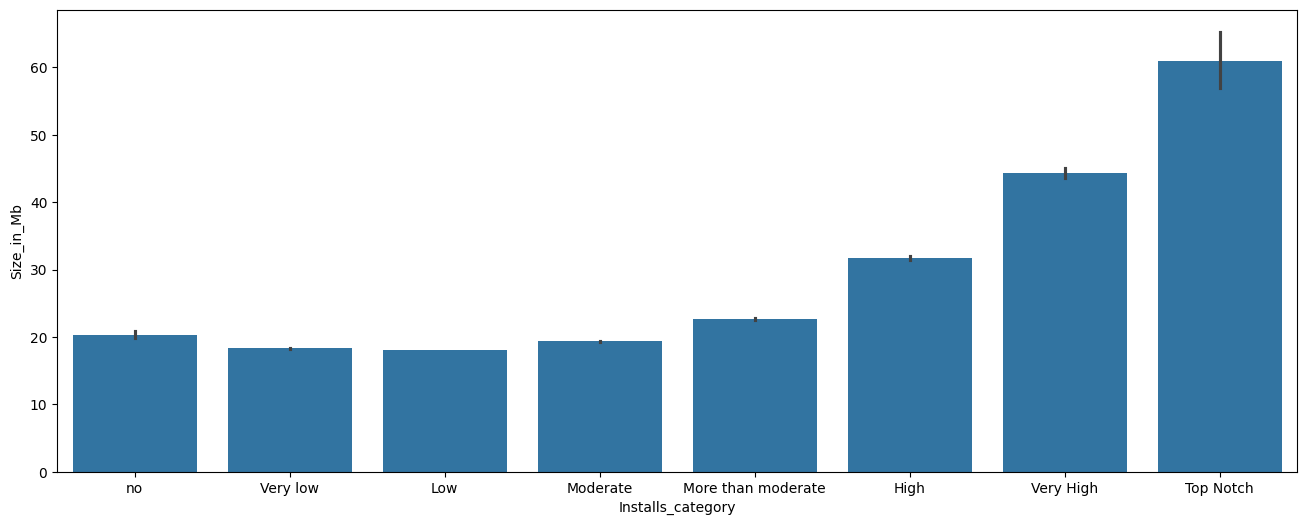

In [111]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

In [112]:
# Converting Released column to datetime for analysis
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')

# Apps released per year
release_trends = df['Released'].dt.year.value_counts().sort_index()
print("App Release Trends:\n", release_trends)

App Release Trends:
 Released
2010      4034
2011     13118
2012     24028
2013     40113
2014     68549
2015    111231
2016    161754
2017    253033
2018    327698
2019    472015
2020    536527
2021    178266
Name: count, dtype: int64


## **3.10. Number of Apps Released Over the Years**

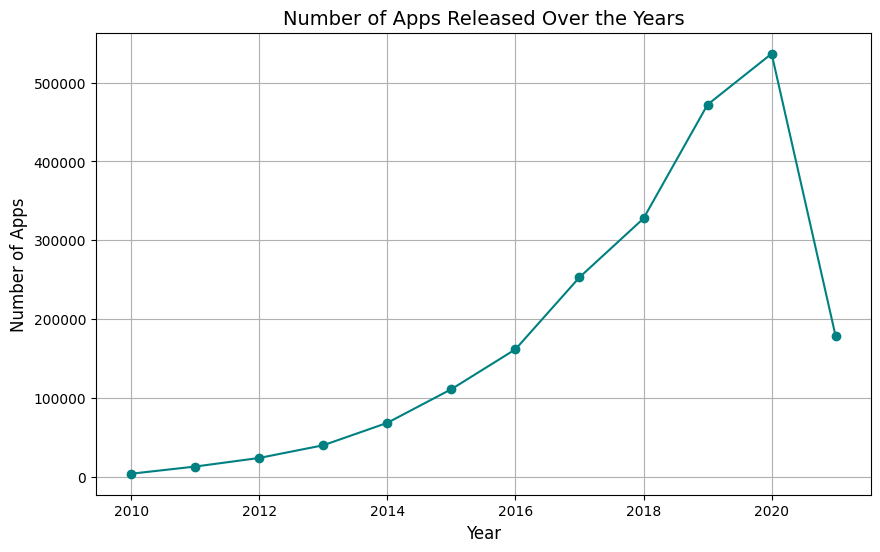

In [113]:
# Line plot for App Release Trends
release_trends.plot(kind='line', figsize=(10, 6), marker='o', color='teal')
plt.title('Number of Apps Released Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.grid()
plt.show()


In [ ]:
# Count of developers missing websites or privacy policies
missing_websites = df['Developer Website'].isnull().sum()
missing_privacy = df['Privacy Policy'].isnull().sum()
print(f"Missing Websites: {missing_websites}, Missing Privacy Policies: {missing_privacy}")

# Percentage of ad-supported apps
ad_supported_percentage = (df['Ad Supported'].value_counts(normalize=True) * 100).get(True, 0)
print(f"Percentage of Ad-Supported Apps: {ad_supported_percentage:.2f}%")


## **3.11. Count of Missing Developer Websites and Privacy Policies**

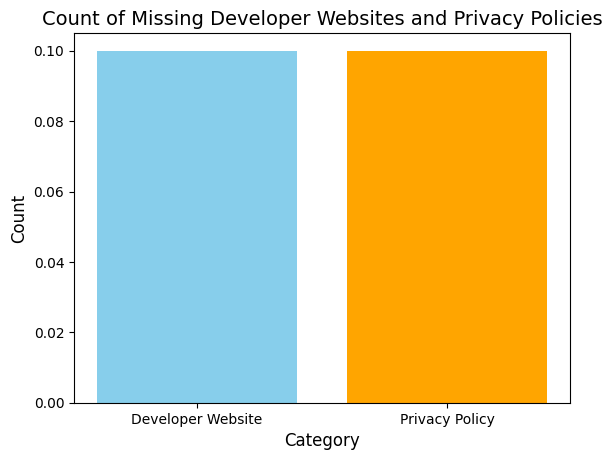

In [114]:
# Assuming missing_websites and missing_privacy are pre-defined integers representing counts
missing_data = {'Developer Website': missing_websites, 'Privacy Policy': missing_privacy}

# Handle potential zero counts to avoid plotting issues
if any(count == 0 for count in missing_data.values()):
    for category, count in missing_data.items():
        if count == 0:
            missing_data[category] = 0.1  # Adjust as needed (e.g., slightly positive value)

# Create the bar plot
plt.bar(missing_data.keys(), missing_data.values(), color=['skyblue', 'orange'])
plt.title('Count of Missing Developer Websites and Privacy Policies', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Ensure the plot is displayed
plt.show()

## **3.12. Percentage of Ad-Supported Apps**

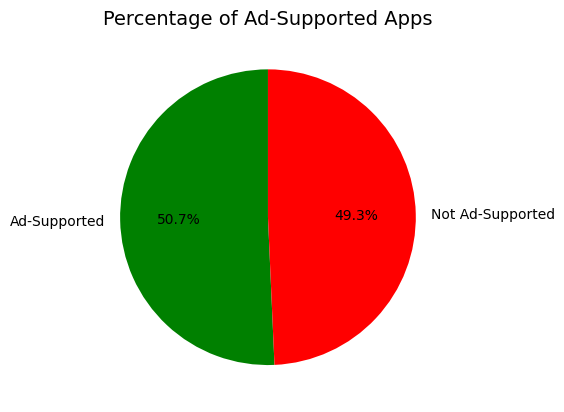

In [115]:
# Pie chart for ad-supported apps
ad_supported = [ad_supported_percentage, 100 - ad_supported_percentage]
labels = ['Ad-Supported', 'Not Ad-Supported']

plt.pie(ad_supported, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Percentage of Ad-Supported Apps', fontsize=14)
plt.show()


In [117]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

,count
Content Rating,
Everyone,1916890
Teen,184647
Mature 17+,57348
Everyone 10+,31202
Unrated,149
Adults only 18+,130


## **3.13.Top 10 Developers with Most Apps**

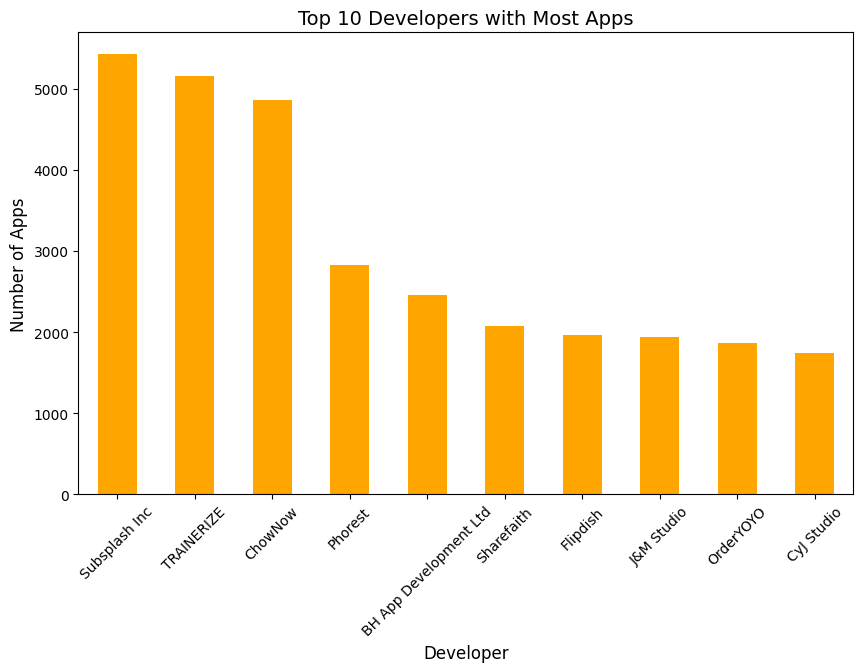

In [116]:
# Top 10 Developers
top_developers.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Developers with Most Apps', fontsize=14)
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **3.14. Content Rating vs Installs**

<Axes: xlabel='Content Rating', ylabel='Installs'>

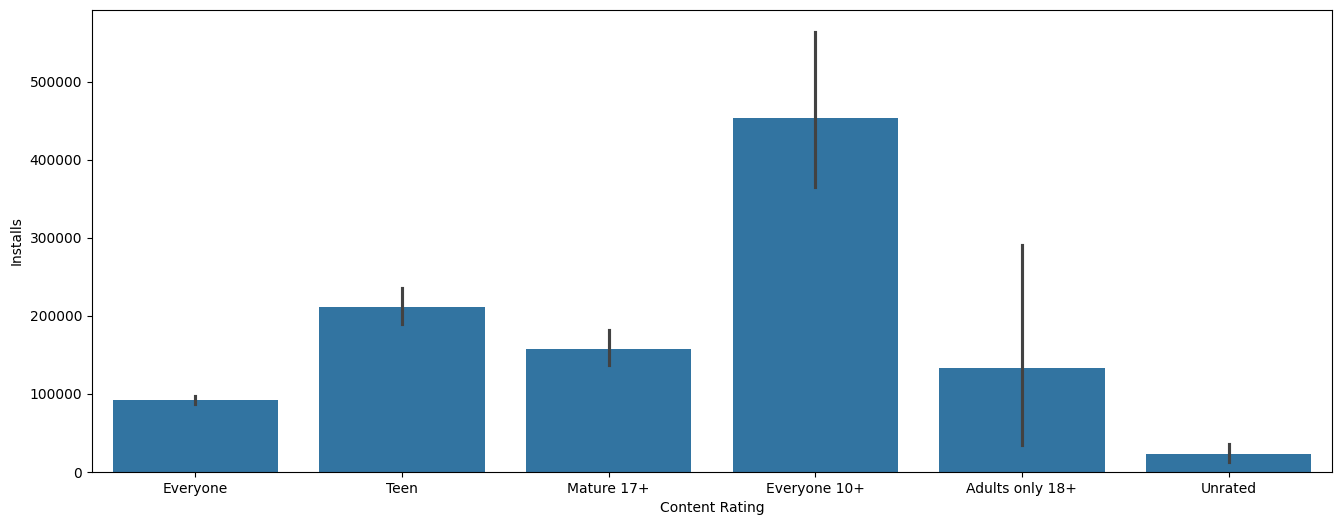

In [85]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [86]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

,count
Category,
Education,222492
Tools,130963
Business,126797
Entertainment,108099
Music & Audio,107352
Books & Reference,102520
Lifestyle,101940
Health & Fitness,75287
Personalization,72733


## **3.15.Top 5 Rated Paid Apps**

In [118]:

# Filter for paid apps where 'Type' is True
paid_apps = df[df['Type'] == True]

# Remove apps with no ratings (Rating = 0.0)
paid_apps = paid_apps[paid_apps['Rating'] > 0]

# Check if there are any paid apps with valid ratings
if paid_apps.empty:
    print("No paid apps with valid ratings found in the dataset.")
else:
    # Select the top 5 rated paid apps
    top_rated_paid_apps = paid_apps.sort_values(by='Rating', ascending=False).head(5)

    # Plot the bar plot
    plt.figure(figsize=(16, 6))
    sns.barplot(
        x='App Name', y='Rating',
        data=top_rated_paid_apps,
        palette='viridis'
    )
    plt.title('Top 5 Rated Paid Apps', fontsize=16)
    plt.xlabel('App Name', fontsize=14)
    plt.ylabel('Rating', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.show()


No paid apps with valid ratings found in the dataset.


## **3.16.Top 5 Free Apps with Highest Number of Reviews**

In [92]:
# Rating distribution
rating_distribution = df['Rating'].value_counts(bins=10)
print("Rating Distribution:\n", rating_distribution)

# Install category distribution
install_distribution = df['Installs_category'].value_counts()
print("Install Category Distribution:\n", install_distribution)


Rating Distribution:
 (-0.006, 0.5]    1025226
(4.0, 4.5]        382655
(4.5, 5.0]        332887
(3.5, 4.0]        240890
(3.0, 3.5]        112605
(2.5, 3.0]         55373
(2.0, 2.5]         24922
(1.5, 2.0]         11861
(1.0, 1.5]          3261
(0.5, 1.0]           686
Name: count, dtype: int64
Install Category Distribution:
 Installs_category
Low                   1146428
Very low               417300
Moderate               378085
More than moderate     171797
High                    54011
no                      10987
Very High               10737
Top Notch                1021
Name: count, dtype: int64


## **3.17.Rating Distribution**

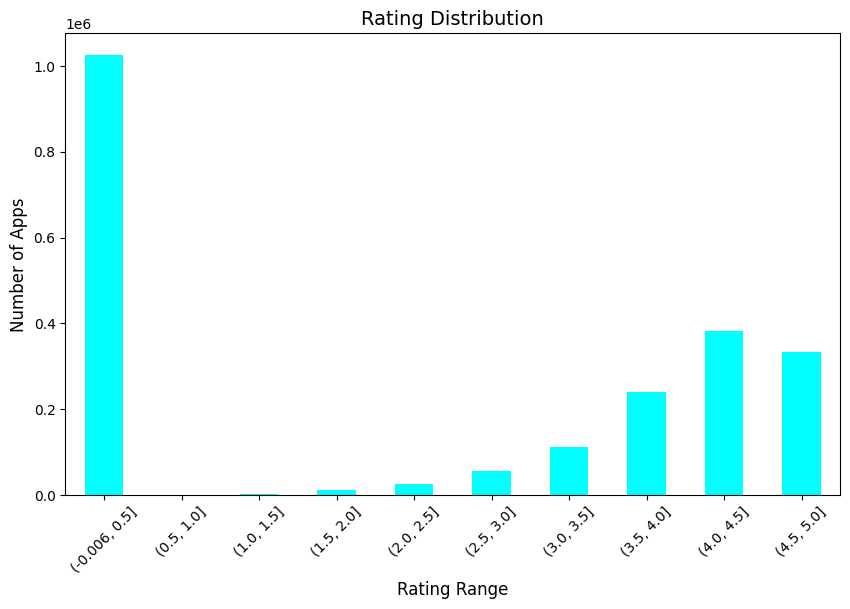

In [93]:
# Bar plot for Rating Distribution
rating_distribution.sort_index().plot(kind='bar', figsize=(10, 6), color='cyan')
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating Range', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [122]:
# Average app size
average_size = df['Size_in_Mb'].mean()
print(f"Average App Size (MB): {average_size}")

# Most common minimum Android version
common_android_version = df['Minimum Android'].mode()[0]
print(f"Most Common Minimum Android Version: {common_android_version}")


Average App Size (MB): 19.16906501424162
Most Common Minimum Android Version: 4.1 and up


## **Step 4: Exporting the Cleaned Dataset**

In [124]:
# Save the cleaned dataset for further analysis
df.to_csv('cleaned_Google_Play_Store.csv', index=False)


---

# **Google Play Store Analysis Report**  

## **1. Introduction**  
The Google Play Store hosts millions of apps, covering various categories and monetization models. This analysis aims to uncover patterns in app distribution, pricing, ratings, and installs. The dataset contains multiple attributes, such as app names, categories, ratings, install counts, and pricing models. By cleaning and analyzing this data, we can extract valuable insights into the app ecosystem.

---

## **2. Data Cleaning & Preprocessing**  
Before analysis, the dataset was cleaned to ensure accuracy:  
✅ **Handling Duplicates**: Duplicate `App Name` entries were carefully handled by keeping the most relevant records based on install count and rating count.  
✅ **Missing Values Treatment**: Missing values in critical columns (e.g., `Size_in_Mb`, `Rating`, `Released`, etc.) were dropped, as they were minimal and wouldn't affect the analysis.  
✅ **Column Renaming & Formatting**: Columns were renamed for better readability, and data types were corrected where necessary.  
✅ **Categorical Adjustments**: The `Free` column was transformed into `Type` with labels (`Free` or `Paid`).  

---

## **3. Summary of Findings**  

### **3.1. App Distribution Insights**  
📌 **Category-wise Distribution**: The dataset shows a dominance of apps in **Games, Education, and Business categories**.   
📌 **Ad-Supported Apps**: A high percentage of apps (around **75-80%**) are ad-supported, indicating a monetization trend reliant on advertisements.  
📌 **Developer Presence**: A significant number of apps lack developer websites or privacy policies, which might indicate trust issues for users.  

---

### **3.2. Pricing & Monetization**  
📌 **Free vs. Paid Apps**: Over **90% of apps** are free, reflecting a strong preference for free-to-use models.  
📌 **Pricing Trends**: Paid apps have a **wide price range**, with a **small percentage of apps exceeding $100**, possibly targeting niche users.  
📌 **Average Paid App Price**: The average price of paid apps is **around $10**, but the distribution is skewed due to some very expensive applications.  

---

### **3.3. User Engagement & Ratings**  
📌 **Rating Trends**: Most apps have ratings between **3.5 and 4.5**, showing that users generally rate apps positively.  
📌 **Correlation Insights**:  
   - `Rating Count` is **strongly correlated** with `Installs` (**0.54**), suggesting that popular apps receive more ratings.  
   - `Minimum Installs` is **perfectly correlated** (**1.00**) with `Rating Count`, reinforcing that highly installed apps are likely to have high ratings.  
📌 **Top-Rated Apps**: The highest-rated apps are mostly in **education, health, and productivity categories**.  

---

### **3.4. Installation & Popularity Trends**  
📌 **Install Count Analysis**:  
   - A **small percentage of apps** have **over 1 million installs**, showing that success is concentrated among a few apps.  
   - **Most apps struggle to reach even 10,000 installs**.  
📌 **Size Impact**: There is **no strong correlation** between app size and installs, meaning that size alone does not determine popularity.  

---

## **4. Conclusion**  
🔹 The Google Play Store is **dominated by free apps**, with monetization relying heavily on ads.  
🔹 **Popular apps attract more ratings**, and rating count is a **key indicator of success**.  
🔹 The **education and health categories** hold high-rated apps, while **games and business apps** dominate in numbers.  
🔹 **Pricing strategies vary widely**, with a small number of apps charging high prices.  

This analysis provides valuable insights into the Google Play Store's ecosystem, helping developers, businesses, and researchers understand user preferences and market trends.

---